In [50]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import random
import sys
sys.path.append('../')
from Core_Functions import neural_networks, generate_image_set

In [51]:
# Load data and split into training and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
# Split training set further into training and validation sets
sample_size = 40000
X_train, X_val, y_train, y_val = train_images[:sample_size], train_images[sample_size:sample_size*2],  train_labels[:sample_size], train_labels[sample_size:sample_size*2]

In [53]:
combo_train_X, combo_train_y = generate_image_set.get_left_min_image_combinations(40000, X_train, y_train)
combo_val_X, combo_val_y = generate_image_set.get_right_min_image_combinations(20000, X_val, y_val)

In [54]:
# Reshape the data so they can be fed into the network, one-hot-encode the labels

train_images = combo_train_X.reshape((combo_train_X.shape[0], 28*56,))
train_images = train_images/ 255

val_images = combo_val_X.reshape((combo_val_X.shape[0], 28*56,))
val_images = val_images/255

test_images = combo_test_X.reshape((combo_test_X.shape[0], 28*56,))
test_images = test_images/255

train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)

test_labels = to_categorical(combo_test_y)

In [55]:
model = neural_networks.build_DNN(28*56)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               803328    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 808,458
Trainable params: 808,458
Non-trainable params: 0
_________________________________________________________________


In [56]:
model = neural_networks.build_DNN(28*56)
history = model.fit(train_images,
          train_labels,
          validation_data = (val_images, val_labels),
          epochs = 20,
          batch_size = 64,
          verbose = 0)

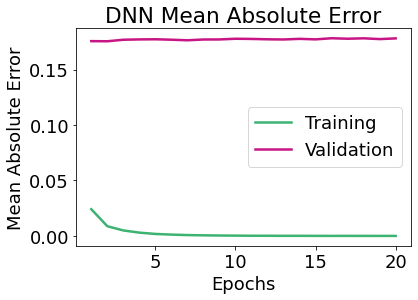

In [57]:
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'], label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'], label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('DNN Mean Absolute Error')
plt.savefig('Q2_Figures/Q2_DNN_MAE.png', dpi = 400, bbox_inches="tight")

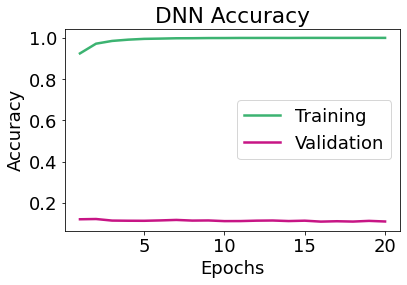

In [58]:
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.title('DNN Accuracy')
plt.savefig('Q2_Figures/Q2_DNN_Accuracy.png', dpi = 400, bbox_inches="tight")

Predicted: 8
True: 8


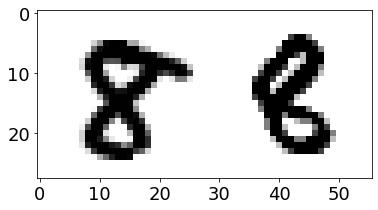

In [59]:
# Verify above by visually inspecting images from the predicted set
y_predict = model.predict(val_images)
num_val_images = 10000

# Run this cell repeatedly to see multiple examples
check_index = random.randint(0,num_val_images)
plt.imshow(val_images[check_index].reshape(28,56), cmap = plt.cm.binary)
print("Predicted: " + str(np.argmax(y_predict[check_index])))
print("True: " + str(np.argmax(val_labels[check_index])))

In [60]:
# Save trained model for later use

# serialize model to JSON
model_json = model.to_json()
with open("Q2_Trained_Models/Q2_DNN_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Q2_Trained_Models/Q2_DNN_Model.h5")
print("Saved model to disk")

Saved model to disk
